## Heat Budget

In this notebook, we test the depth-integrated heat budget from one of the ensemble runs. The heat budget can be written as 

$$ \frac{\partial Q}{\partial t} = \mathcal{H} - \nabla \cdot  \mathcal{F_h} $$

We can get rid of divergence by integrating in $x$ and $y$.

$$ \int_{y_0}^{y}\int_{x_w}^{x_e}\frac{\partial Q}{\partial t} = \int_{y_0}^{y}\int_{x_w}^{x_e} \mathcal{H} - \mathcal{F_h}[y] + \mathcal{F_h}[y_0]$$

Here, $Q$ is the depth-integrated heat content, $\mathcal{H}$ surface heat flux, and $\mathcal{F_h}$ is the heat transport. For test purposes, we take mean over all ensembles and only focus on changes over the whole simulation. 

In [3]:
# Read ensemble data for run started in year 2008

import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ppdir="/home/users/hkhatri/DePreSys4_Data/Data_Consolidated/"

ds1 = xr.open_dataset(ppdir + "2008_diaptr.nc") 

ds2 = xr.open_dataset(ppdir + "2008_hfds.nc") 

ds_area = xr.open_dataset(ppdir + "Area.nc")
ds_area = ds_area.get(['area_t'])
ds_area = ds_area.rename({'x':'i', 'y':'j'})

ds2 = xr.merge([ds2, ds_area])

print(ds1, ds2)

<xarray.Dataset>
Dimensions:                  (axis_nbounds: 2, deptht: 75, depthw: 75, r: 10, time_counter: 125, x: 1, y: 451)
Coordinates:
  * deptht                   (deptht) float32 0.50576 1.5558553 ... 5902.0576
  * depthw                   (depthw) float32 0.0 1.0239066 ... 5596.249 5800.0
    nav_lat                  (y, x) float32 ...
    nav_lon                  (y, x) float32 ...
    time_centered            (time_counter) object ...
  * time_counter             (time_counter) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
Dimensions without coordinates: axis_nbounds, r, x, y
Data variables:
    deptht_bounds            (r, time_counter, deptht, axis_nbounds) float32 ...
    depthw_bounds            (r, time_counter, depthw, axis_nbounds) float32 ...
    hfbasin_atlantic         (r, time_counter, y, x) float32 ...
    hfbasinpadv_atlantic     (r, time_counter, y, x) float32 ...
    hfbasinpmadv_atlantic    (r, time_counter, y, x) float32 ...
    hfbasinpmdiff_atlantic   (r, time_count

In [8]:
ds1.hfbasin_atlantic

<xarray.DataArray 'hfbasin_atlantic' (r: 10, time_counter: 125, y: 451, x: 1)>
[563750 values with dtype=float32]
Coordinates:
    nav_lat        (y, x) float32 3.9967546 4.246108 ... 79.91785 79.98739
    nav_lon        (y, x) float32 ...
    time_centered  (time_counter) object ...
  * time_counter   (time_counter) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Dimensions without coordinates: r, y, x
Attributes:
    standard_name:       northward_ocean_heat_transport
    long_name:           Advective Heat Transport
    units:               PW
    online_operation:    average
    interval_operation:  900 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 900 s)

In [9]:
Heat_total = (ds1['hfbasin_atlantic'] - ds1['hfbasin_atlantic'].isel(y=0)).mean(['r','time_counter','x'])

Heat_overturning = (ds1['hfovovrt_atlantic'] - ds1['hfovovrt_atlantic'].isel(y=0)).mean(['r','time_counter','x'])

Heat_gyre = (ds1['hfovgyre_atlantic'] - ds1['hfovgyre_atlantic'].isel(y=0)).mean(['r','time_counter','x'])

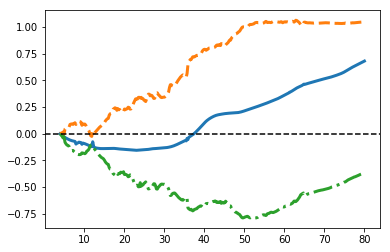

In [15]:
plt.plot(ds1.nav_lat.isel(x=0), - Heat_total, lw=3, ls='-')
plt.plot(ds1.nav_lat.isel(x=0), - Heat_overturning, lw=3, ls='--')
plt.plot(ds1.nav_lat.isel(x=0), - Heat_gyre, lw=3, ls='-.')
plt.axhline(y=0, ls='--', color='k')

In [23]:
Heat_Flux = (ds2['hfds'].mean(['r','time']) * ds2['area_t']).sum('i')

int_Heat_Flux = Heat_Flux.cumsum('j')

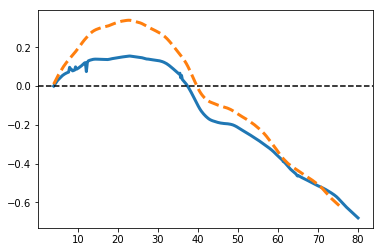

In [32]:
# The difference betweeen the two curves indicates the changes in heat content
# This is a rough calculation. Need to be precise about which area cells to consider.
# Specifically, need to ignore areas that are in Pacific

plt.plot(ds1.nav_lat.isel(x=0), Heat_total, lw=3, ls='-')

plt.plot(ds2['latitude'].mean('i'), int_Heat_Flux / 1.e15, lw =3, ls='--')

plt.axhline(y=0, ls='--', color='k')

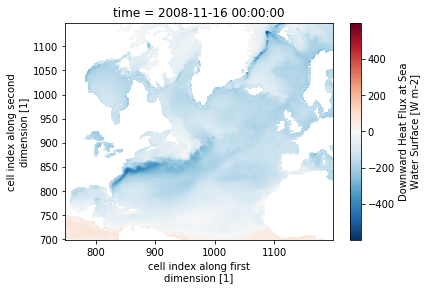

In [22]:
ds2['hfds'].isel(r=0,time=0).plot()